## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Exploratory Data Analysis

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset from csv to pandas dataframe
df=pd.read_csv('train.csv',low_memory=False)
#print shape of data frame
df.shape

(1460, 81)

In [3]:
# Print dataset sample
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Describe dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Print datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

In [6]:
# Dropping 'Id' column as its just an index and has no significance.
df.drop('Id',axis=1,inplace=True)
print(df.shape)

(1460, 80)


In [7]:
missing_data = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)
pd.set_option('display.max_rows', 100)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

Its clear that there are many columns where significant amount of data is missing. From the above table, it seems that its reasonable to drop all the columns where more than 80% of the data is missing.

In [8]:
#Dropping columns where missing values are more than 80%
df=df.drop(list(missing_data[missing_data>=80].index),axis=1)
df.shape

(1460, 76)

In [9]:
#Check missing values
missing_data = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)
pd.set_option('display.max_rows', 100)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [10]:
#Split columns into numerical and non-numerical bins
num=[]
non_num=[]

for col in list(df):
    if df[col].dtypes=='object':
        non_num.append(col)
    else:
        num.append(col)
        
print("Non Numerical Columns\n",non_num)
print("Numerical Columns\n",num)

Non Numerical Columns
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Columns
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclose

In [11]:
# Analyzing unique values in all Non-Numerical varibales
unique=[]
for col in non_num:
    unique.append(len(df[col].value_counts()))
cat_table={'category':non_num,'unique_value':unique}
pd.DataFrame(cat_table)

,category,unique_value
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [12]:
# Since FireplaceQu has highest number of null values. Lets take a look at this column in detail
# unique values in 'FireplaceQu'
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

According to the data dictionary, NA here means 'No Fireplace' which is useful information.

In [13]:
# Lets replace 'NA' here with 'No Fireplace'
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

Similarly according to data dictionary:
- 'NA' in  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' means  'No Garage'
- 'NA' in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' means 'No Basement'
which is useful information

In [14]:
# Therefore replacing 'NA' with 'No Garage' and setting 'GarageYrBlt' to '0' in such cases
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('No Garage', inplace=True)
    
df['GarageYrBlt'].fillna(0, inplace=True)

#Replacing 'NA' with 'No Basement'
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df[col].fillna('No Basement', inplace=True)

In [15]:
#Check missing values
missing_data = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)
pd.set_option('display.max_rows', 100)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

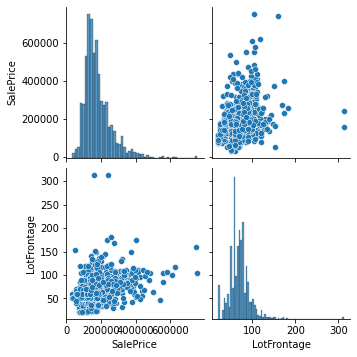

In [16]:
#Now Lets take a look at 'LotFrontage'
sns.pairplot(df[['SalePrice','LotFrontage']])

There seems to be some relation between SalePrice and LotFrontage.This data is important therefore lets replace NULL values with median values rather than dropping them 

In [17]:
#Replacing 'NA' with median values
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median())

In [18]:
#Check missing values
missing_data = round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)
pd.set_option('display.max_rows', 100)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

MasVnrType    0.55
MasVnrArea    0.55
Electrical    0.07
dtype: float64

In [19]:
#Now there are very few missing value records. Lets drop such data from the dataset.
df.dropna(inplace = True)

Next Lets visualize co-relation using a heatmap

<AxesSubplot:>

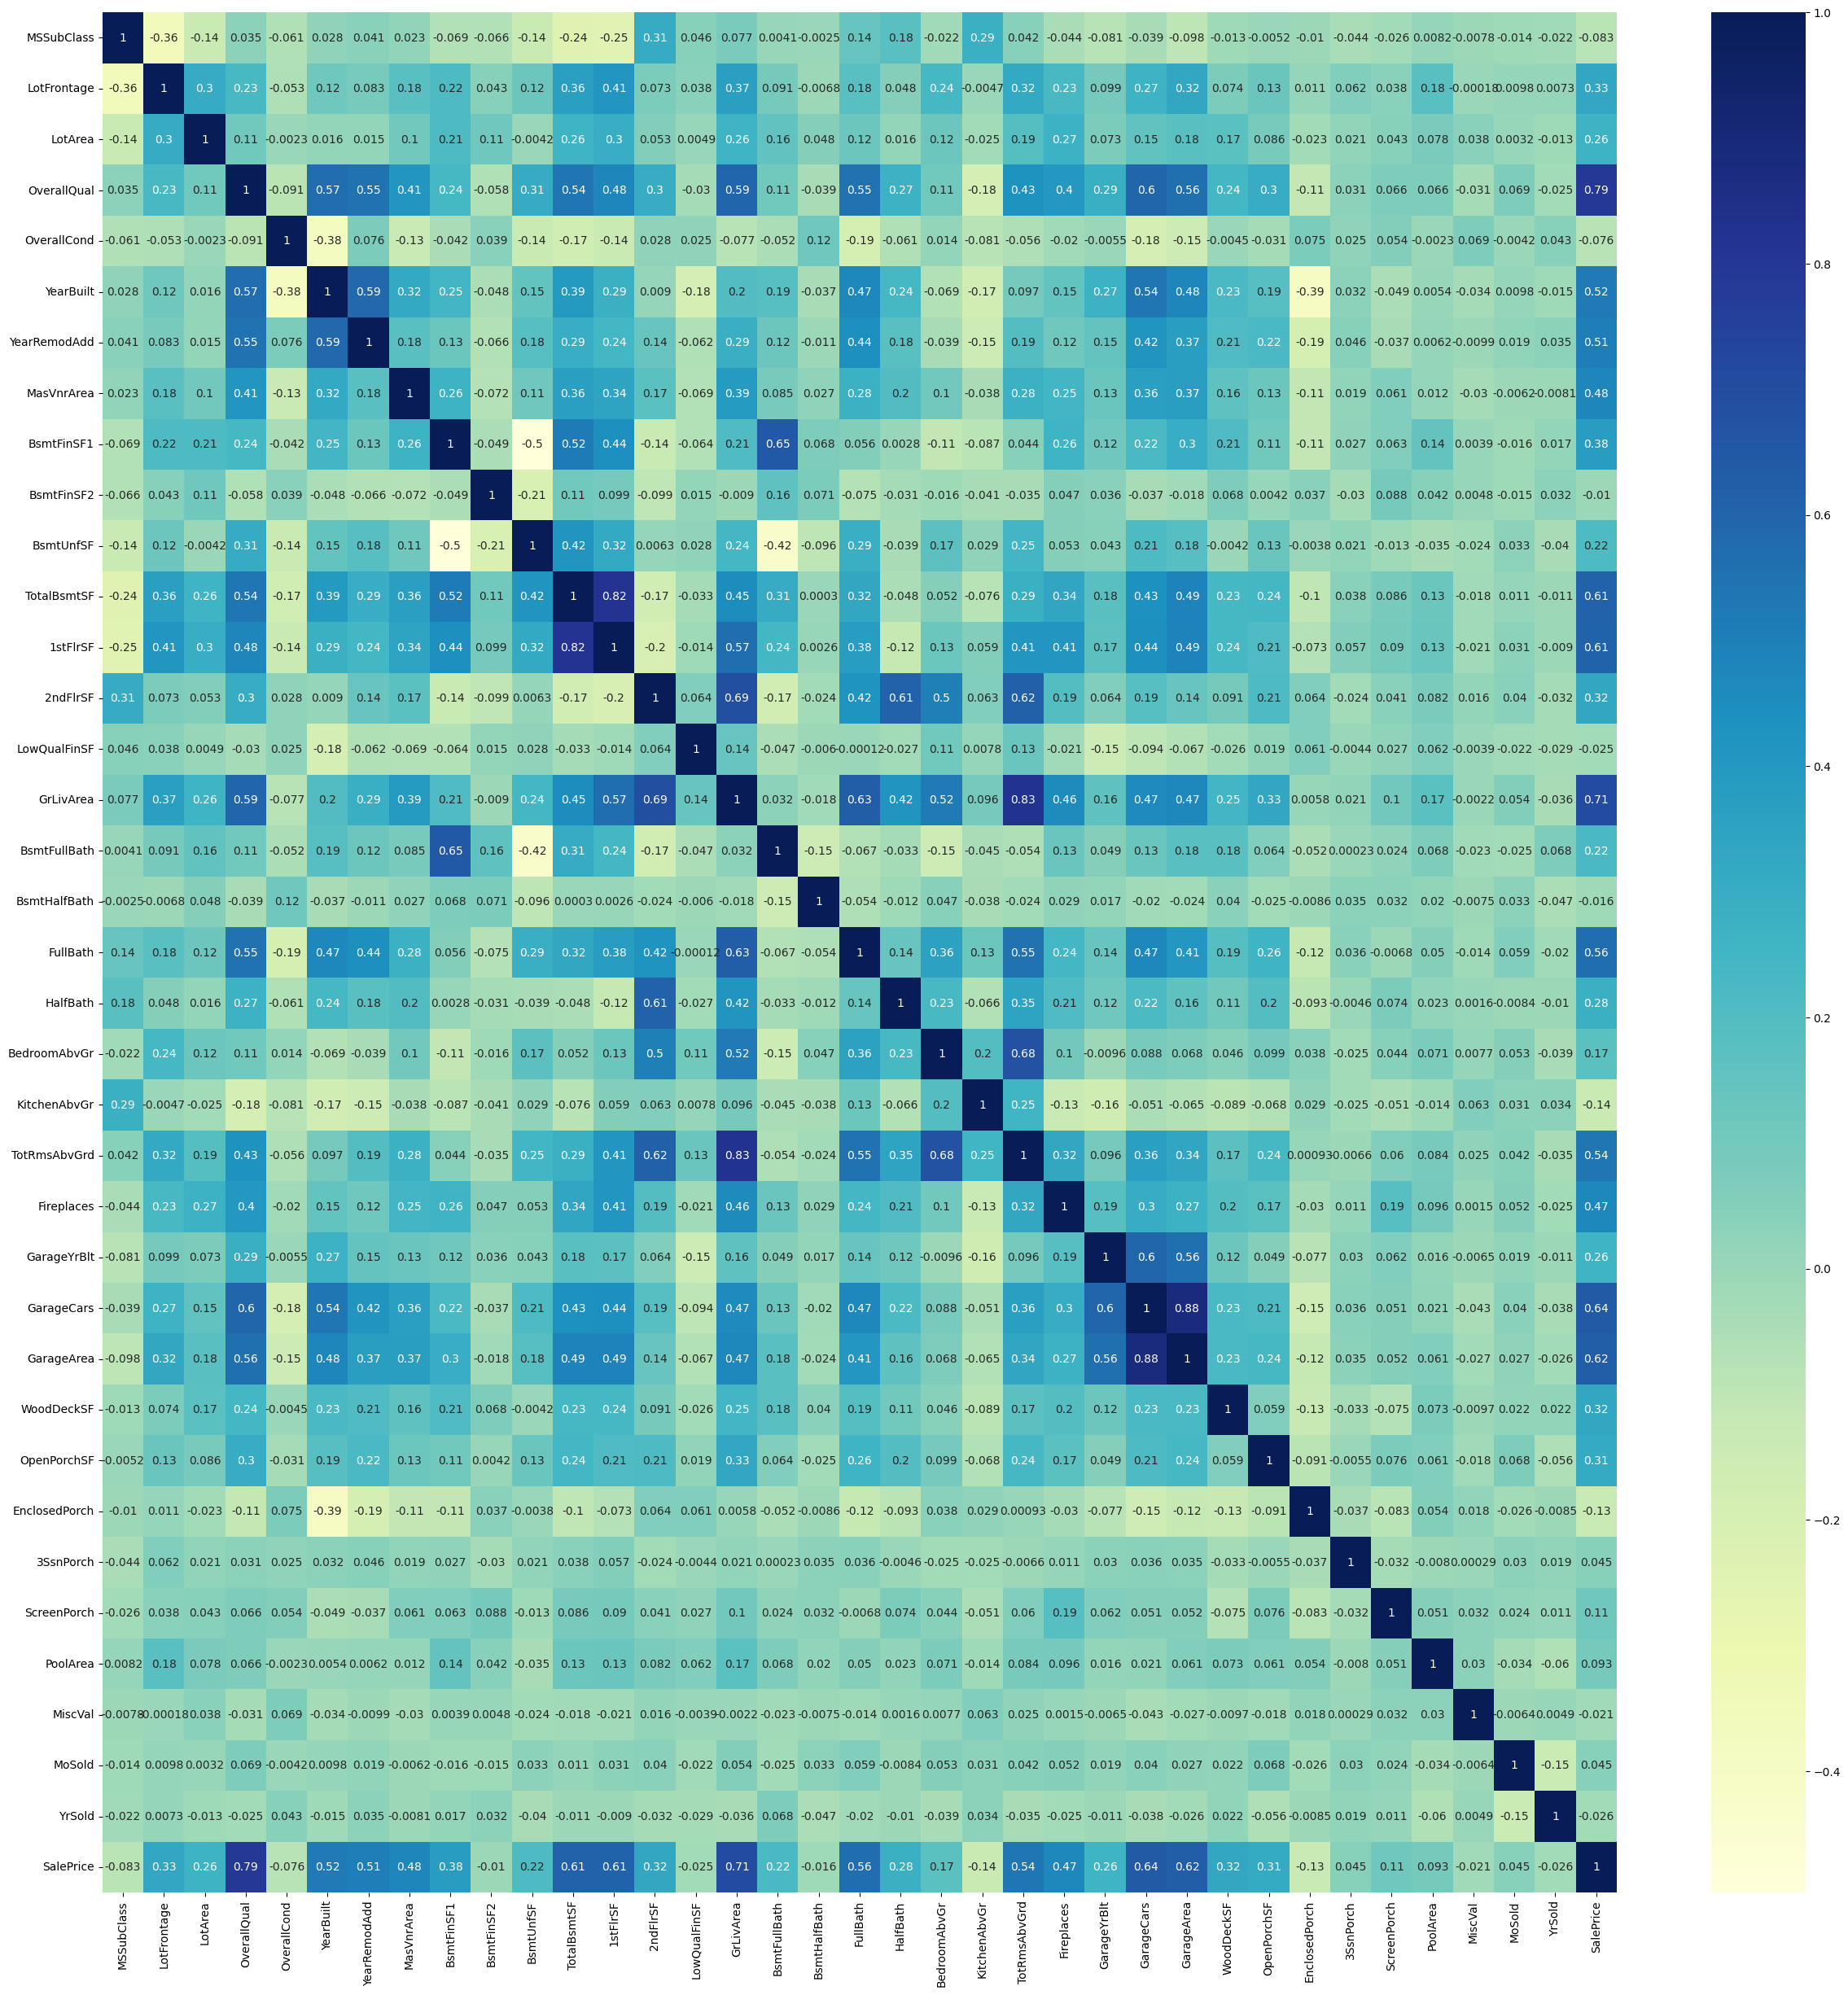

In [20]:
# Now lets take a look at the heatmap to visualize co-relations
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

From the above heatmap, we can see that '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea' are highly co-related to other variables. Lets drop these for simplicity.

In [21]:
col=['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
# Dropping above varibales
df.drop(df[col], axis=1, inplace = True)
df.shape

(1451, 73)

#### Derived variables

In [22]:
# Next Lets create derived variable building age using currentyear information and 'YearBuilt'
import datetime
df['CurrentYear'] = datetime.datetime.now().year
df["BuildingAge"] = df['CurrentYear'] - df['YearBuilt']
#Now dropping CurrentYear and YearBuilt as this information is redundant
df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

In [23]:
# Now that we have modified a lot of columns, lets get the latest list of numeric and non numeric columns

num = []
non_num = []

for col in list(df):
    if df[col].dtypes == 'object':
        non_num.append(col)  
    else:
        num.append(col)
print("Non Numerical Columns\n",non_num)
print("Numerical Columns\n",num)


Non Numerical Columns
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical Columns
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscV

#### Dummy variables

In [24]:
# Creating dummy variables for all categorical variables
dummy = pd.get_dummies(df[non_num], drop_first=True)
# Concatinating dumy variables to the original dataframe
df=pd.concat([df,dummy],axis=1)
# Dropping original categorical varibales
df=df.drop(non_num,axis=1)
df.shape

(1451, 244)

## Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

print("Train Data Shape",df_train.shape)
print("Test Data Shape",df_test.shape)

Train Data Shape (1015, 244)
Test Data Shape (436, 244)


## Scaling Numerical Variables

In [26]:
# Scaling numerical varibales on the train data set
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_train[num]=scaler.fit_transform(df_train[num])

df_train[num].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BuildingAge
801,0.058824,0.065068,0.016359,0.250,0.714286,0.666667,0.000000,0.034904,0.000000,0.427654,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.545455,0.25,0.105619,0.681159
569,0.411765,0.164384,0.026792,0.375,0.428571,0.483333,0.000000,0.167080,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.00,0.142318,0.224638
1181,0.588235,0.147260,0.020038,0.750,0.428571,0.966667,0.116250,0.262225,0.000000,0.051370,...,0.096892,0.0,0.301181,0.0,0.0,0.0,0.909091,0.50,0.503591,0.014493
808,0.352941,0.219178,0.056557,0.375,0.428571,0.266667,0.654375,0.091425,0.114286,0.162671,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.454545,0.00,0.176102,0.318841
1095,0.000000,0.195205,0.037472,0.500,0.428571,0.933333,0.000000,0.004252,0.000000,0.552226,...,0.040219,0.0,0.000000,0.0,0.0,0.0,0.181818,0.25,0.199313,0.028986


In [27]:
# Scaling numerical variables on the test data set

df_test[num]=scaler.transform(df_test[num])
df_test[num].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BuildingAge
357,0.588235,0.078767,0.013667,0.375,0.428571,0.433333,0.0,0.154855,0.000000,0.114726,...,0.164534,0.000000,0.0,0.000000,0.0,0.0,0.636364,0.25,0.139558,0.246377
824,0.000000,0.205479,0.046348,0.750,0.428571,0.933333,0.0,0.000000,0.000000,0.637414,...,0.255941,0.000000,0.0,0.000000,0.0,0.0,0.454545,0.00,0.278411,0.028986
369,0.000000,0.164384,0.039870,0.375,0.714286,0.933333,0.0,0.012757,0.230357,0.313784,...,0.031079,0.000000,0.0,0.379167,0.0,0.0,0.181818,1.00,0.178989,0.369565
291,1.000000,0.116438,0.020505,0.375,0.571429,0.833333,0.0,0.037208,0.000000,0.244007,...,0.336380,0.000000,0.0,0.000000,0.0,0.0,0.181818,0.50,0.142233,0.710145
134,0.000000,0.195205,0.042230,0.375,0.571429,0.716667,0.0,0.100992,0.000000,0.381421,...,0.175503,0.326087,0.0,0.000000,0.0,0.0,0.545455,0.00,0.204337,0.304348


In [28]:
# Dividing train and  test dataset into X and Y
y_train=df_train.pop('SalePrice')
X_train=df_train
y_test=df_test.pop('SalePrice')
X_test=df_test

## Model Building and Evaluation

Now Lets start to predict sale price with a Liner Regression Model
### Linear Regression

In [29]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-10604923693.280216
[ 2.63467290e-03  4.28721318e-02  2.51975500e-01  8.09605529e-02
  5.33000215e-02  8.12490854e-03  4.29014153e-02  6.63811379e+10
  1.31727276e+10  2.74745461e+10 -7.18619334e+10  7.24849701e-02
 -4.93786335e-02  3.99400234e-01  3.36813927e-03 -1.76613331e-02
  8.22067261e-04  7.10487366e-04 -5.15031815e-02 -7.81297684e-02
  1.36852264e-02  3.68972778e-01  3.91664505e-02  1.28331184e-02
 -3.92198563e-04 -7.90357590e-04  1.97772384e-02  1.83391571e-03
  9.84757543e-02 -1.29354000e-03  1.79100037e-03 -3.49044800e-04
 -5.03439903e-02  6.78186417e-02  5.81879616e-02  5.67140579e-02
  3.93848419e-02  4.21895981e-02  4.67532873e-03 -3.78444791e-03
  3.33786011e-05  2.45213509e-03 -1.36785507e-02  4.25863266e-03
 -2.57623196e-03  1.13182068e-02 -9.74893570e-03 -3.63826752e-02
 -2.08377838e-03  5.34725189e-03 -7.44547844e-02  1.75660849e-02
  2.00226307e-02  2.78134346e-02 -9.37426090e-03 -5.44738770e-03
  3.68647575e-02 -5.29766083e-03 -9.01937485e-03  2.28608847e-02
  8.8

In [31]:
# Calculate r2_score,RSS and mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("residual_sum_of_squares_train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("residual_sum_of_squares_test:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mean_squared_error_train:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mean_squared_error_test:",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train: 0.9466466985753278
r2_test: -2.174187922052628e+19
residual_sum_of_squares_train: 0.6727335433969425
residual_sum_of_squares_test: 1.1903793318524512e+20
mean_squared_error_train: 0.0006627916683713718
mean_squared_error_test: 2.7302278253496586e+17


### Ridge and Lasso Regression
Let's now try predicting sale price by performing ridge and lasso regression.

#### Ridge Regression

In [32]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [34]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.26859516e-02  1.13352286e-03  3.28601613e-02  8.96973249e-02
  3.26103419e-02  1.28279478e-02  3.12897813e-02  2.19879846e-02
  5.08718319e-03  2.41893931e-02  3.04916944e-02  7.06064896e-02
  9.80243923e-03  9.06741777e-02  3.35749312e-02 -9.04940087e-03
  4.67468572e-02  1.93141812e-02  2.53853535e-02 -1.12714240e-02
  3.37333667e-02  3.57020102e-05  6.39271566e-02  2.41703945e-02
  2.09131271e-03  6.05202568e-03  1.67063176e-02  1.32276546e-02
  1.79390525e-02 -3.02842571e-03  1.24048023e-03 -3.67338836e-03
  2.74587866e-03  1.33499374e-02  1.15064520e-02  1.40551211e-02
  5.12564131e-03  1.59597144e-02  1.53223242e-02 -1.44037506e-02
 -2.95384709e-03  2.27776737e-02  1.39521865e-02  2.07590763e-02
 -6.65717173e-03  1.28813220e-02 -1.56605777e-02 -1.15164659e-02
 -3.05086739e-03  7.58448888e-03  5.03440436e-03 -5.20373798e-03
  1.08958446e-03  3.31753675e-03 -9.93018790e-03 -7.29420742e-03
  2.51601024e-02 -2.38042002e-02 -1.90502845e-02 -1.38636658e-02
 -1.33156346e-02 -1.90469

In [35]:
# Calculate r2_score,RSS and mean_squared_error
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("residual_sum_of_squares_train:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("residual_sum_of_squares_test:",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mean_squared_error_train:",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mean_squared_error_test:",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train: 0.8885698121048389
r2_test: 0.8691214605588805
residual_sum_of_squares_train: 1.4050269269641436
residual_sum_of_squares_test: 0.7165668926477154
mean_squared_error_train: 0.0013842629822306833
mean_squared_error_test: 0.0016435020473571456


#### Lasso

In [36]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [38]:
#Fitting lasso model for alpha = 0.0001 

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [39]:
lasso.coef_

array([-3.28468897e-02, -2.64588985e-04,  7.17135965e-02,  1.20990700e-01,
        3.96923340e-02,  8.38167154e-03,  2.68706582e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.20980942e-02,
       -0.00000000e+00,  3.27169256e-01,  3.33464364e-02, -0.00000000e+00,
        2.51067643e-02,  9.98471994e-03,  0.00000000e+00, -1.34957608e-02,
        1.22444576e-02, -0.00000000e+00,  6.72233187e-02,  1.61970081e-02,
        0.00000000e+00, -0.00000000e+00,  3.04611812e-03,  9.11669601e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.40690529e-03,
       -1.59804665e-03,  8.94871358e-03,  0.00000000e+00,  9.33108668e-03,
       -0.00000000e+00,  1.22853269e-02,  7.37647243e-03, -2.99892317e-02,
       -2.42534317e-03,  1.96890390e-02,  1.11693622e-02,  1.58211138e-02,
       -0.00000000e+00,  1.51319937e-02, -8.70138527e-03, -0.00000000e+00,
       -0.00000000e+00,  1.34183988e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [40]:
# Calculate r2_score,RSS and mean_squared_error
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("residual_sum_of_squares_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("residual_sum_of_squares_test:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mean_squared_error_train:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mean_squared_error_test:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train: 0.9000951480492267
r2_test: 0.8681335620224924
residual_sum_of_squares_train: 1.2597035846091231
residual_sum_of_squares_test: 0.7219756891356177
mean_squared_error_train: 0.0012410872754769686
mean_squared_error_test: 0.0016559075438890316


In [41]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.466467e-01,0.888570,0.900095
1,R2 Score (Test),-2.174188e+19,0.869121,0.868134
2,RSS (Train),6.727335e-01,1.405027,1.259704
3,RSS (Test),1.190379e+20,0.716567,0.721976
4,MSE (Train),2.574474e-02,0.037206,0.035229
5,MSE (Test),5.225158e+08,0.040540,0.040693


### Lets observe the changes in the coefficients after regularization

In [42]:
betas = pd.DataFrame(index=X_train.columns)

In [43]:
betas.rows = X_train.columns

In [44]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [45]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,2.634673e-03,-0.022686,-0.032847
LotFrontage,4.287213e-02,0.001134,-0.000265
LotArea,2.519755e-01,0.032860,0.071714
OverallQual,8.096055e-02,0.089697,0.120991
OverallCond,5.330002e-02,0.032610,0.039692
YearRemodAdd,8.124909e-03,0.012828,0.008382
MasVnrArea,4.290142e-02,0.031290,0.026871
BsmtFinSF1,6.638114e+10,0.021988,0.000000
BsmtFinSF2,1.317273e+10,0.005087,-0.000000
BsmtUnfSF,2.747455e+10,0.024189,0.000000


## Conclusion

- Plain Liner Regression seem to overfit on training dataset and perform poorly on the test dataset.
- Best value for alpha for Ridge Regression seem to be aroung 5:
    - r2_score on training dataset = 0.8885698121048389
    - r2_score on test dataset = 0.8691214605588805
- Best value for alpha for lasso Regression seem to be around 0.0001:
    - r2_score on training dataset = 0.9000951480492267
    - r2_score on test dataset = 0.8681335620224924
- As expected, usage of Lasso regularization causes some of the variable coefficients to drop to 0 effectively removing them from model.
- Ridge regression seem to be overall better model as it has slightly better r2 score,RSS and MSE than lasso on test set. However, it should be noted that Lasso seems to perform almost as well and is a much simpler model as it has less number of features and can result in significant savings in production. Therefore the choice of model is heavily dependent on the business usecase and accuracy tolerance.

### Top 5 important variables according to Ridge Regularized model that affect Sale Price:

In [46]:
# List top 5 important variables according to Ridge Regularized model that affect Sale Price:
print(betas['Ridge'].sort_values(ascending = False)[:5])

GrLivArea               0.090674
OverallQual             0.089697
2ndFlrSF                0.070606
GarageCars              0.063927
Neighborhood_NoRidge    0.055852
Name: Ridge, dtype: float64


### Top 5 important variables according to Lasso Regularized model that affect Sale Price:

In [47]:
# List top 5 important variables according to Lasso Regularized model that affect Sale Price:
print(betas['Lasso'].sort_values(ascending = False)[:5])

GrLivArea           0.327169
OverallQual         0.120991
LotArea             0.071714
RoofMatl_WdShngl    0.067915
GarageCars          0.067223
Name: Lasso, dtype: float64


### Features removed by Lasso are as follows:

In [48]:
print(betas[betas['Lasso']==0])

                                Linear     Ridge  Lasso
BsmtFinSF1                6.638114e+10  0.021988    0.0
BsmtFinSF2                1.317273e+10  0.005087   -0.0
BsmtUnfSF                 2.747455e+10  0.024189    0.0
TotalBsmtSF              -7.186193e+10  0.030492    0.0
LowQualFinSF             -4.937863e-02  0.009802   -0.0
BsmtHalfBath             -1.766133e-02 -0.009049   -0.0
BedroomAbvGr             -5.150318e-02  0.025385    0.0
GarageYrBlt               3.689728e-01  0.000036   -0.0
OpenPorchSF              -3.921986e-04  0.002091    0.0
EnclosedPorch            -7.903576e-04  0.006052   -0.0
PoolArea                  9.847575e-02  0.017939    0.0
MiscVal                  -1.293540e-03 -0.003028   -0.0
MoSold                    1.791000e-03  0.001240    0.0
MSZoning_RH               5.818796e-02  0.011506    0.0
MSZoning_RM               3.938484e-02  0.005126   -0.0
Utilities_NoSeWa         -2.576232e-03 -0.006657   -0.0
LotConfig_FR3            -3.638268e-02 -0.011516

## Code to Answer Subjective assignment Questions

In [49]:
# Ridge regression after doubling best alpha value (alpha=10)
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [50]:
#Fitting lasso model after doubling best alpha value (alpha=0.0002) 

alpha =0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [51]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,2.634673e-03,-0.022562,-0.038121
LotFrontage,4.287213e-02,0.006819,-0.000000
LotArea,2.519755e-01,0.021208,0.014199
OverallQual,8.096055e-02,0.077680,0.132236
OverallCond,5.330002e-02,0.026920,0.035278
YearRemodAdd,8.124909e-03,0.015815,0.010354
MasVnrArea,4.290142e-02,0.027527,0.013932
BsmtFinSF1,6.638114e+10,0.018854,0.000000
BsmtFinSF2,1.317273e+10,0.004478,-0.000000
BsmtUnfSF,2.747455e+10,0.023359,0.000000


In [52]:
# List top 5 important variables according to Ridge Regularized model that affect Sale Price (alpha=10):
print(betas['Ridge'].sort_values(ascending = False)[:5])

OverallQual             0.077680
GrLivArea               0.068713
2ndFlrSF                0.057081
GarageCars              0.055826
Neighborhood_NoRidge    0.050920
Name: Ridge, dtype: float64


In [53]:
# List top 5 important variables according to Lasso Regularized model that affect Sale Price (alpha=0.0002):
print(betas['Lasso'].sort_values(ascending = False)[:5])

GrLivArea               0.310389
OverallQual             0.132236
GarageCars              0.065671
Neighborhood_NoRidge    0.057761
Neighborhood_NridgHt    0.047924
Name: Lasso, dtype: float64


In [54]:
# Calculate r2_score,RSS and mean_squared_error for ridge regularization with alpha =10
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)


r2_train: 0.8763979567973651
r2_test: 0.8601170560096947


In [55]:
# Calculate r2_score,RSS and mean_squared_error for lasso regularization with alpha =0.0002
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train:",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:",r2_test_lr)

r2_train: 0.8868067293968984
r2_test: 0.8704235251850165


In [56]:
## To answer question 3 from subjective questions we remove top 5 most important varibales for lasso model from the data and recreate a new model
#Fitting lasso model after doubling best alpha value (alpha=0.0002) 

non_available=['GrLivArea','OverallQual','LotArea','RoofMatl_WdShngl']

X_train=X_train.drop(non_available,axis=1)

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [58]:
alpha =0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [59]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_

In [60]:
# List top 5 important variables according to Lasso Regularized model that affect 
# Sale Price (after dropping previous top 5 variables):
print(betas['Lasso'].sort_values(ascending = False)[:5])

TotalBsmtSF             0.231637
2ndFlrSF                0.168807
GarageCars              0.087821
Neighborhood_NoRidge    0.064074
Neighborhood_StoneBr    0.060083
Name: Lasso, dtype: float64
